# Darts Throwing Problem
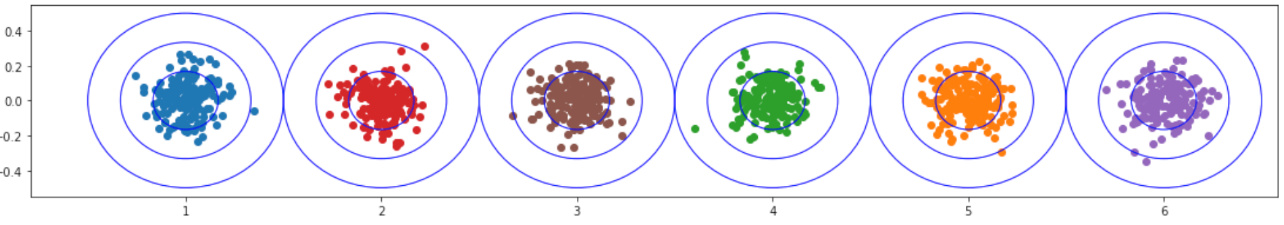
#### The prerequisites for implementation are shown below.
* Let's assume that multiple darts are lined up in a row without a gap.
* Suppose darts aimed at one number do not go to another.

#### The flow to be implemented is as follows.
* Select a dart mat. (Here, roll the dice and use the number on the roll as the target number.)
* Select the number on the dice and throw the darts. (Here, the place where the darts stick is assumed to follow a normal distribution.)
* Record where the darts stuck. (Not only the x and y coordinates, but also the number of the thrown target.)
* Repeat 1~3 the specified number of times (the number of darts thrown). (The specified number of times is arbitrary.)
* Plot where the darts of each number stuck. (If there are 6 dart mats, it is an image of 6 dart mats arranged side by side at equal intervals.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath

## Choosing a dart mat

In [2]:
def roll_dice(n): 
    dart_mat = np.arange(1, n+1)
    choice = np.random.choice(dart_mat)
    return choice

## Throw darts and record the place

In [3]:
def record_place(dart_mat):
    cov = [[0.01, 0], [0, 0.01]]
    mean = [dart_mat, 0]
    x, y = np.random.multivariate_normal(mean, cov)
    return (x, y)

## Throw darts and record the place

In [4]:
def throw(n, board_numb):
    board_list = [[] for _ in range(n)]
    for i in range(n):
        dart_mat = roll_dice(board_numb)
        x, y = record_place(dart_mat)
        board_list[dart_mat-1].append([x, y])
    return board_list

## Visualization with `pyplot.scatter`

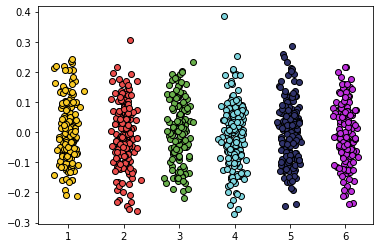

In [5]:
dart_thrown = throw(1000, 6)
def draw_scatter(dart_thrown, board_numb):
    mycolor = ['#f9ca24', '#eb4d4b', '#6ab04c', '#7ed6df', '#30336b', '#be2edd','#f9ca24', '#eb4d4b', '#6ab04c', '#7ed6df']
    for i in range(board_numb):
        x, y = np.array(dart_thrown[i]).T
        plt.scatter(x, y, color=mycolor[i], edgecolor='black',zorder=2)

# demo without set_aspect(1.0)
mycolor = ['#f9ca24', '#eb4d4b', '#6ab04c', '#7ed6df', '#30336b', '#be2edd']
for i in range(6):
    x, y = np.array(dart_thrown[i]).T
    plt.scatter(x, y, color=mycolor[i], edgecolor='black',zorder=2)

## Visualization with `patches.Circle`

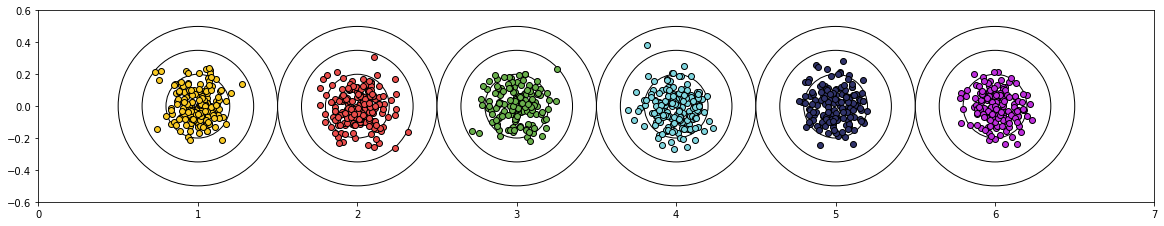

In [6]:
def visualize(dart_thrown, board_numb):
    fig, axis = plt.subplots()
    # Draw circle
    for i in range(1, board_numb+1):
        dart_board_out = mpatches.Circle((i, 0), 0.5, ec='black', fc='white')
        dart_board_mid = mpatches.Circle((i, 0), 0.35, ec='black', fc='white')
        dart_board_in = mpatches.Circle((i, 0), 0.2, ec='black', fc='white')
        axis.add_patch(dart_board_out)
        axis.add_patch(dart_board_mid)
        axis.add_patch(dart_board_in)
    
    # Draw scatter
    draw_scatter(dart_thrown, board_numb)

    fig.set_figwidth(20)
    axis.set_aspect(1.0)
    axis.set_xlim(0,board_numb+1)
    axis.set_ylim(-0.6, 0.6)
    plt.show()
    
visualize(dart_thrown, 6)

## Functionalize

In [7]:
def dart_throwing(board_numb, throw_numb):
    test = throw(throw_numb, board_numb)
    visualize(test, board_numb)

## Test

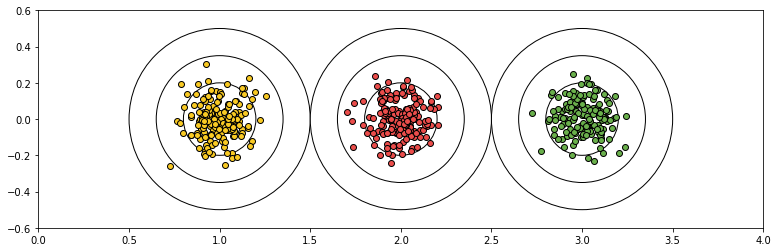

In [8]:
dart_throwing(3, 500)

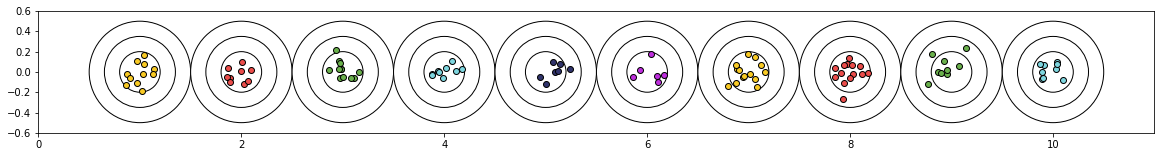

In [9]:
dart_throwing(10, 100)